In [154]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/isro-dataset/ISRO mission launches.csv


# ****Data Loading

In [155]:
df = pd.read_csv('/kaggle/input/isro-dataset/ISRO mission launches.csv', encoding='latin1')
df.head(20)


,SL No,Launch Date,Launch Vehicle,Launch Vehicle.1,Orbit Type,Application,Remarks
0,125,Aditya-L1,02-Sep-23,PSLV-C57/Aditya-L1 Mission,Lunar,Planetary Observation,Launch successful
1,124,Chandrayaan-3,14-Jul-23,LVM3 M4 / Chandrayaan-3 Mission,Lunar,Planetary Observation,Launch successful
2,123,NVS-01,29-May-23,GSLV-F12/NVS-01 Mission,NaN,Navigation,Launch successful
3,122,EOS-07,10-Feb-23,SSLV-D2/EOS-07 Mission,NaN,Earth Observation,Launch successful
4,121,Thybolt,26-Nov-22,PSLV-C54/EOS-06 Mission,NaN,Earth Observation,Launch successful
5,120,Thybolt,26-Nov-22,PSLV-C54/EOS-06 Mission,NaN,Earth Observation,Launch successful
6,119,Anand,26-Nov-22,PSLV-C54/EOS-06 Mission,NaN,Earth Observation,Launch successful
7,118,INS-2B,26-Nov-22,PSLV-C54/EOS-06 Mission,NaN,Earth Observation,Launch successful
8,117,EOS-06,26-Nov-22,PSLV-C54/EOS-06 Mission,NaN,Earth Observation,Launch successful
9,116,EOS-02,07-Aug-22,SSLV-D1/EOS-02 Mission,NaN,Earth Observation,Launch successful


## As we can see we ave error in the dataset corresponding to the Two columns 'Launch Vehicle' and 'Launch Date' 
## So we're swapping these Two

In [156]:

df.rename(columns={'Launch Vehicle': 'Launch Date', 'Launch Date': 'Launch Vehicle'}, inplace=True)

# ****Data Info

In [157]:
df.head(20)

,SL No,Launch Vehicle,Launch Date,Launch Vehicle.1,Orbit Type,Application,Remarks
0,125,Aditya-L1,02-Sep-23,PSLV-C57/Aditya-L1 Mission,Lunar,Planetary Observation,Launch successful
1,124,Chandrayaan-3,14-Jul-23,LVM3 M4 / Chandrayaan-3 Mission,Lunar,Planetary Observation,Launch successful
2,123,NVS-01,29-May-23,GSLV-F12/NVS-01 Mission,NaN,Navigation,Launch successful
3,122,EOS-07,10-Feb-23,SSLV-D2/EOS-07 Mission,NaN,Earth Observation,Launch successful
4,121,Thybolt,26-Nov-22,PSLV-C54/EOS-06 Mission,NaN,Earth Observation,Launch successful
5,120,Thybolt,26-Nov-22,PSLV-C54/EOS-06 Mission,NaN,Earth Observation,Launch successful
6,119,Anand,26-Nov-22,PSLV-C54/EOS-06 Mission,NaN,Earth Observation,Launch successful
7,118,INS-2B,26-Nov-22,PSLV-C54/EOS-06 Mission,NaN,Earth Observation,Launch successful
8,117,EOS-06,26-Nov-22,PSLV-C54/EOS-06 Mission,NaN,Earth Observation,Launch successful
9,116,EOS-02,07-Aug-22,SSLV-D1/EOS-02 Mission,NaN,Earth Observation,Launch successful


In [158]:
df.shape

(125, 7)

In [159]:
df.describe()

,SL No
count,125.000000
mean,63.000000
std,36.228442
min,1.000000
25%,32.000000
50%,63.000000
75%,94.000000
max,125.000000


In [160]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   SL No             125 non-null    int64 
 1   Launch Vehicle    125 non-null    object
 2   Launch Date       125 non-null    object
 3   Launch Vehicle.1  125 non-null    object
 4   Orbit Type        104 non-null    object
 5   Application       121 non-null    object
 6   Remarks           125 non-null    object
dtypes: int64(1), object(6)
memory usage: 7.0+ KB


In [161]:
df.isnull().sum()

SL No                0
Launch Vehicle       0
Launch Date          0
Launch Vehicle.1     0
Orbit Type          21
Application          4
Remarks              0
dtype: int64

In [162]:
df.columns

Index(['SL No', 'Launch Vehicle', 'Launch Date', 'Launch Vehicle.1',
       'Orbit Type', 'Application', 'Remarks'],
      dtype='object')

In [163]:
for column in df.select_dtypes(include=['object']).columns:
    print(f"\nValue counts for column: {column}")
    print(df[column].value_counts())


Value counts for column: Launch Vehicle
Launch Vehicle
Cartosat-2 Series Satellite                  2
Thybolt                                      2
CARTOSAT-2                                   1
The Technology Experiment Satellite (TES)    1
INSAT-3C                                     1
                                            ..
INS-1B                                       1
INS-1A                                       1
Cartosat -2 Series Satellite                 1
GSAT-9                                       1
Aryabhata                                    1
Name: count, Length: 123, dtype: int64

Value counts for column: Launch Date
Launch Date
26-Nov-22    5
15-Feb-17    3
12-Jan-18    3
20-Apr-11    2
05-May-05    2
            ..
22-Jun-16    1
08-Sep-16    1
26-Sep-16    1
06-Oct-16    1
19-Apr-75    1
Name: count, Length: 112, dtype: int64

Value counts for column: Launch Vehicle.1
Launch Vehicle.1
PSLV-C54/EOS-06 Mission                         5
PSLV-C37 / Cartosat -2 S

# Data manipulation

In [164]:
df['Orbit Type'].fillna('Unknown', inplace=True)
df['Application'].fillna('Unknown', inplace=True)

In [165]:
df['Launch Date'] = pd.to_datetime(df['Launch Date'])
df['Year'] = df['Launch Date'].dt.year
df['Month'] = df['Launch Date'].dt.month
df['Day'] = df['Launch Date'].dt.day

print(df[['Year', 'Month', 'Day']].describe())

              Year       Month         Day
count   125.000000  125.000000  125.000000
mean   2008.152000    6.536000   17.040000
std      12.478405    3.423222    8.409288
min    1975.000000    1.000000    1.000000
25%    2001.000000    4.000000   10.000000
50%    2013.000000    6.000000   17.000000
75%    2018.000000    9.000000   24.000000
max    2023.000000   12.000000   31.000000


# ****Exploratory Data Analysis

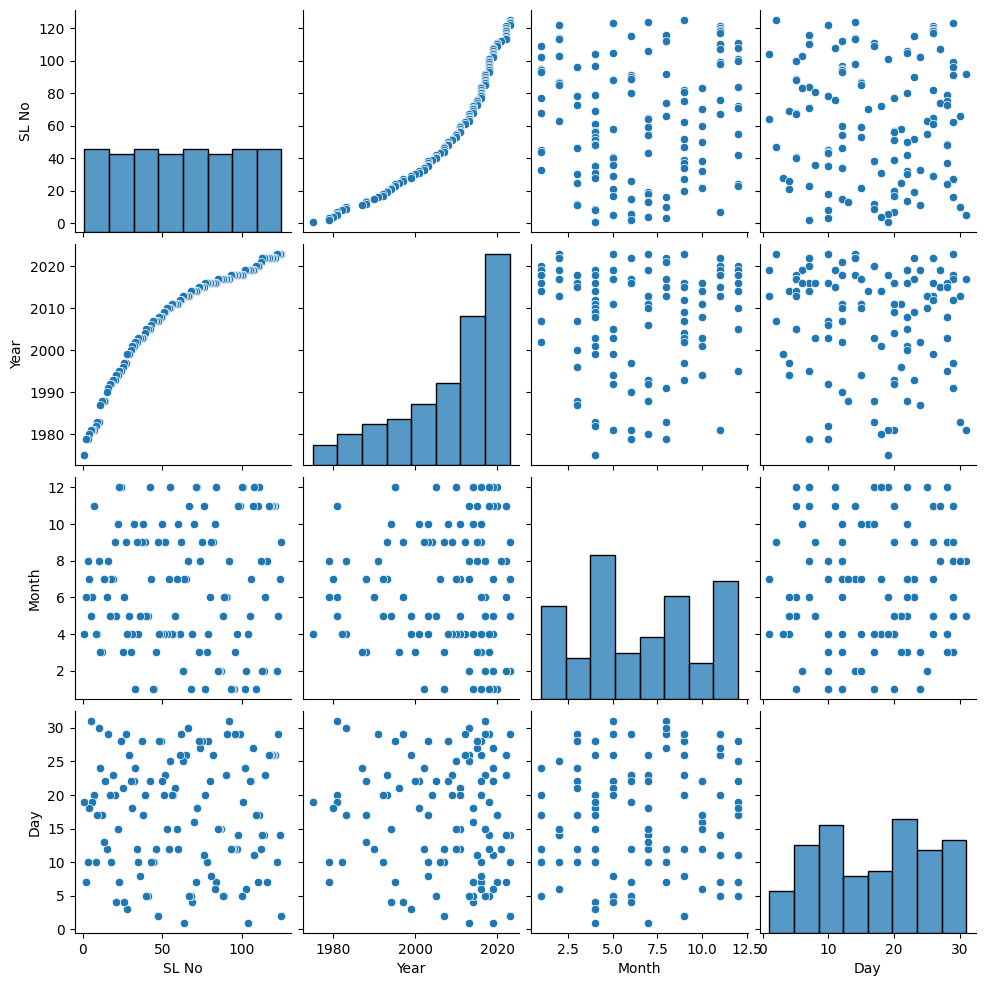

In [166]:
sns.pairplot(data=df)
plt.show()

# Application

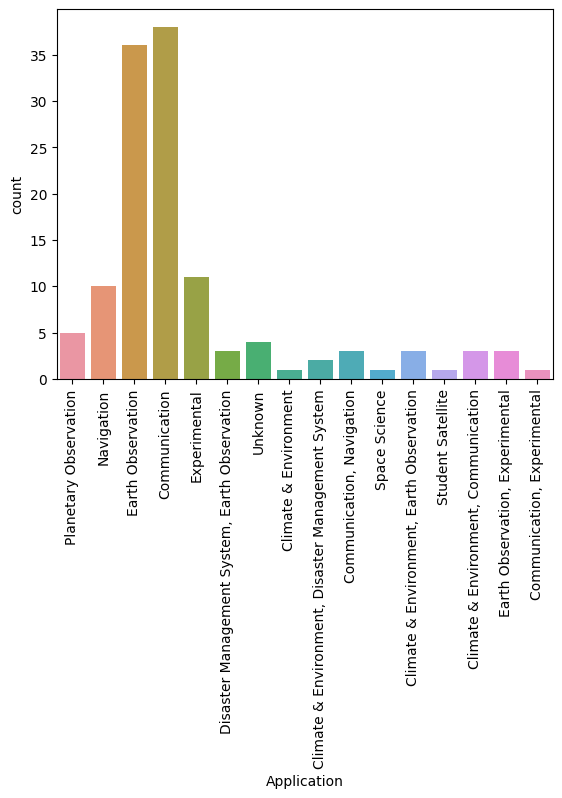

In [167]:
sns.countplot(data=df,x='Application')
plt.xticks(rotation=90)
plt.show()


application_counts = df['Application'].value_counts()
fig4 = go.Figure(data=[go.Pie(labels=application_counts.index, values=application_counts.values)])
fig4.update_layout(title='Application Distribution')
fig4.show()

# Remarks

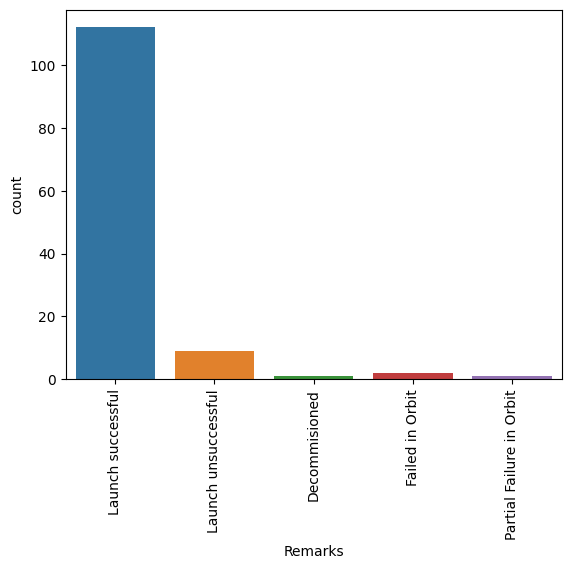

In [168]:
sns.countplot(data=df,x='Remarks')
plt.xticks(rotation=90)
plt.show()

# Remarks vs Orbit Type

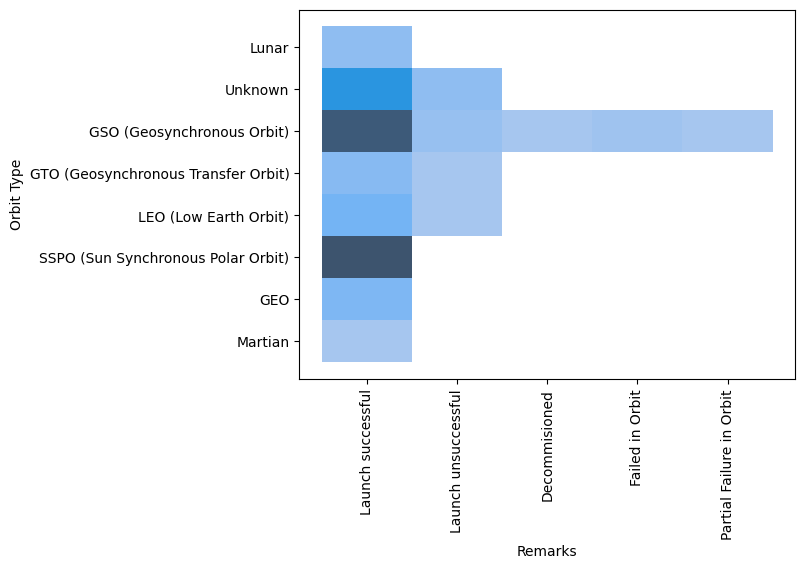

In [169]:
sns.histplot(data=df,x='Remarks',y='Orbit Type')
plt.xticks(rotation=90)
plt.show()

# Number of launches per year

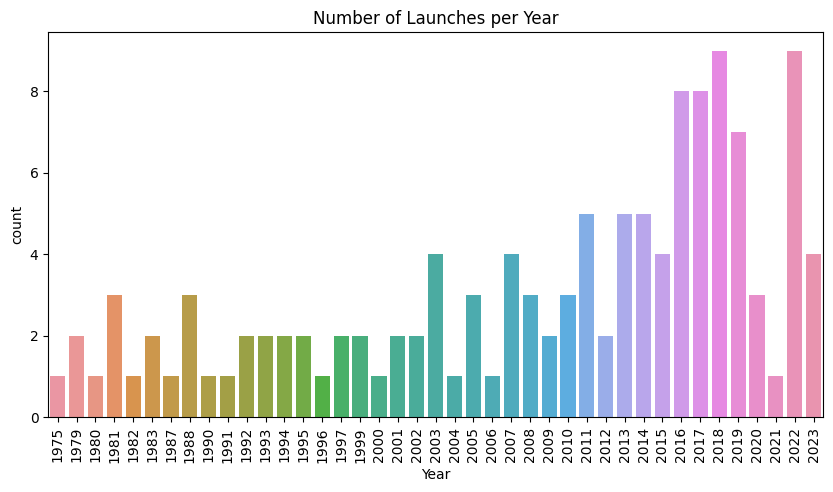

In [170]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='Year')
plt.title("Number of Launches per Year")
plt.xticks(rotation=90)
plt.show()

# Success Rate by Orbit Type

In [171]:
# Example 8: Bar chart for 'Orbit Type' counts
orbit_type_counts = df['Orbit Type'].value_counts()
fig8 = px.bar(x=orbit_type_counts.index, y=orbit_type_counts.values, 
              title='Orbit Type Counts')
fig8.show()



orbit_success_rates = df.groupby('Orbit Type')['Remarks'].apply(lambda x: (x == 'Launch successful').mean()).reset_index()


# Distribution of Mission Applications

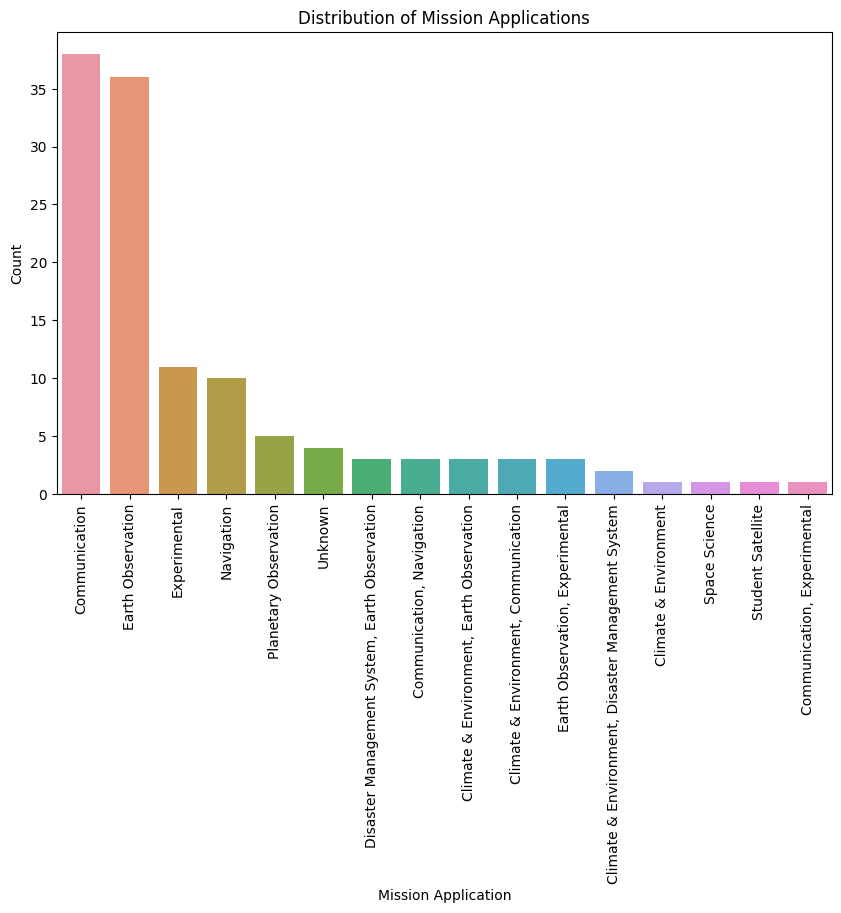

In [172]:
application_counts = df['Application'].value_counts()

# Create a bar plot to visualize mission application distribution
plt.figure(figsize=(10, 6))
sns.barplot(x=application_counts.index, y=application_counts.values)
plt.title('Distribution of Mission Applications')
plt.xlabel('Mission Application')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

# 'Launch Vehicle' counts

In [173]:
launch_vehicle_counts = df['Launch Vehicle'].value_counts()
fig2 = px.bar(x=launch_vehicle_counts.index, y=launch_vehicle_counts.values, 
              title='Launch Vehicle Counts')
fig2.show()

# 'Launch Date' vs. 'Orbit Type'

In [174]:
fig3 = px.scatter(df, x='Launch Date', y='Orbit Type', 
                  title='Launch Date vs. Orbit Type')
fig3.show()

# Time Series Analysis ('Launch Date' vs. 'SL No')

In [175]:
fig7 = px.line(df, x='Launch Date', y='SL No', title='SL No over Time')
fig7.show()

# Word Clouds for Text Data

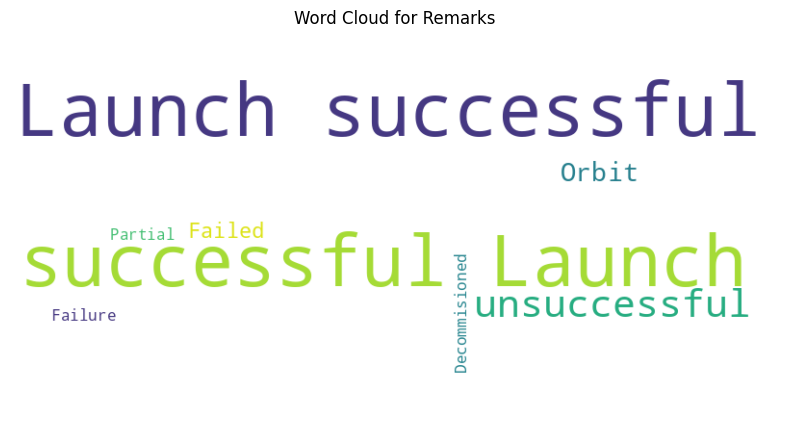

In [176]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

remarks_text = ' '.join(df['Remarks'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(remarks_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Remarks')
plt.axis('off')
plt.show()
